In [56]:
import matplotlib.pyplot as plt

import json
import os
import cv2
import numpy as np
import random
import os
from skimage import transform

In [57]:
"""Prepare Data"""
path = ''
images_path = path + "eccv_18_all_images_sm"
labels_path = path + "CaltechCameraTrapsECCV18.json"

with open(labels_path) as json_file:
    data = json.load(json_file)
    
path_lst = next(os.walk(images_path))[2]

print(len(path_lst))

data['categories']

57864


[{'id': 6, 'name': 'bobcat'},
 {'id': 1, 'name': 'opossum'},
 {'id': 30, 'name': 'empty'},
 {'id': 9, 'name': 'coyote'},
 {'id': 3, 'name': 'raccoon'},
 {'id': 11, 'name': 'bird'},
 {'id': 8, 'name': 'dog'},
 {'id': 16, 'name': 'cat'},
 {'id': 5, 'name': 'squirrel'},
 {'id': 10, 'name': 'rabbit'},
 {'id': 7, 'name': 'skunk'},
 {'id': 99, 'name': 'rodent'},
 {'id': 21, 'name': 'badger'},
 {'id': 34, 'name': 'deer'},
 {'id': 33, 'name': 'car'},
 {'id': 51, 'name': 'fox'}]

In [58]:
clist, cdict = [], {}
for category in data['categories']:
    cdict[category['id']] = len(clist)
    clist.append(category['name'])

num_categories = len(clist)

adict = {}
for annotation in data['annotations']:
    adict[annotation['image_id']] = cdict[annotation['category_id']]

print(clist)
cdict

['bobcat', 'opossum', 'empty', 'coyote', 'raccoon', 'bird', 'dog', 'cat', 'squirrel', 'rabbit', 'skunk', 'rodent', 'badger', 'deer', 'car', 'fox']


{6: 0,
 1: 1,
 30: 2,
 9: 3,
 3: 4,
 11: 5,
 8: 6,
 16: 7,
 5: 8,
 10: 9,
 7: 10,
 99: 11,
 21: 12,
 34: 13,
 33: 14,
 51: 15}

In [61]:
dim = (512, 384)
def select(idx):
    image = path_lst[idx]
    
    imarr = cv2.imread(images_path + '/' + image, cv2.IMREAD_COLOR)
    imarr = cv2.resize(imarr, dim, interpolation = cv2.INTER_AREA)
    #imarr = transform.resize(imarr, dim, mode='reflect')
    
    label = adict[image.split('.')[0]]
    
    return imarr / 255, label

599be8e2-23d2-11e8-a6a3-ec086b02610b.jpg
1.0
coyote
(384, 512, 3)
float64
float16


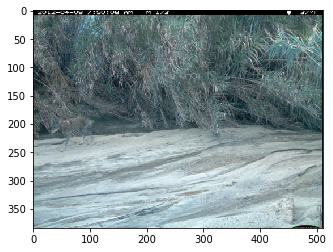

In [62]:
idx = random.randint(0, len(path_lst))
imarr, label = select(idx)
print(path_lst[idx])
print(np.max(imarr))
print(clist[label])
print(imarr.shape)
print(imarr.dtype)
imarr = imarr.astype('float16')
print(imarr.dtype)
plt.imshow(imarr.astype('float32'))

In [96]:
size_dict, label_dict = {}, {}
i = 0
for idx in range(len(path_lst)):
    imarr, label = select(idx)
    
    if imarr.shape in size_dict:
        size_dict[imarr.shape] += 1
    else:
        size_dict[imarr.shape] = 1
        
    if label in label_dict:
        label_dict[label] += 1
    else:
        label_dict[label] = 1
    
    if i % 500 == 0:
        print(i / len(path_lst) * 100, '% done')
    i+=1

print(label_dict)
size_dict

0.0 % done
0.8640951195907645 % done
1.728190239181529 % done
2.5922853587722936 % done
3.456380478363058 % done
4.3204755979538225 % done
5.184570717544587 % done
6.048665837135352 % done
6.912760956726116 % done
7.77685607631688 % done
8.640951195907645 % done
9.50504631549841 % done
10.369141435089174 % done
11.233236554679939 % done
12.097331674270704 % done
12.961426793861468 % done
13.825521913452231 % done
14.689617033042998 % done
15.55371215263376 % done
16.41780727222453 % done
17.28190239181529 % done
18.145997511406055 % done
19.01009263099682 % done
19.874187750587584 % done
20.73828287017835 % done
21.602377989769113 % done
22.466473109359878 % done
23.330568228950643 % done
24.194663348541408 % done
25.05875846813217 % done
25.922853587722937 % done
26.7869487073137 % done
27.651043826904463 % done
28.515138946495227 % done
29.379234066085996 % done
30.24332918567676 % done
31.10742430526752 % done
31.971519424858286 % done
32.83561454444906 % done
33.699709664039815 % d

{(747, 1024, 3): 52912, (768, 1024, 3): 4952}

In [55]:
z = np.zeros(shape=(4, 10), dtype='byte')
print(z)
z[1:3] = np.ones(shape=(2, 10), dtype='byte')
print(z)

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0]]


In [ ]:
amount = 1000
image_lst, label_lst = [], []
i = 1
for idx in random.sample(range(len(path_lst)), amount):
    imarr, label = select(idx)
    
    image_lst.append(imarr)
    
    label_vec = np.zeros(num_categories)
    label_vec[label] = 1
    label_lst.append(label_vec)
    
    if i % 50 == 0:
        print(i / amount * 100, '% done')
    i+=1
    
image_arr, label_arr = np.array(image_lst), np.array(label_lst)

In [4]:
np.max(image_arr)

0.9235294117647095

In [30]:
np.save(path + 'images.npy', image_arr)
np.save(path + 'labels.npy', label_arr)
np.savez(path + 'label_to_animal.npz', clist)

In [31]:
image_arr.shape

(1000, 224, 224, 3)